# Machine Learning Exercise 6 - Support Vector Machines
Programming exercise for Andrew Ng's Machine Learning Class on Coursera written in python 3.4.

## Support Vector Machines

In this exercise, we will be using support vector machines (SVMs) to build a spam classifier.

### Linear Kernel

We will explore SVMs on 2D datasets.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import scipy.io    # used to read matlab data file in .mat format.
import seaborn as sns
from scipy.optimize import minimize
%matplotlib inline
np.set_printoptions(precision=4, suppress=True)
sns.set_style('white')
rcParams['figure.figsize'] = 8, 6

#### Example Dataset 1

In [2]:
matfile = scipy.io.loadmat('./machine-learning-ex6/ex6/ex6data1.mat')
data1 = np.c_[matfile['X'], matfile['y']]

In [3]:
def plotRaw(data, ax):
    ax.scatter(data[data[:,2]==0][:,0], data[data[:,2]==0][:,1], c='y', marker='o', s=40)
    ax.scatter(data[data[:,2]==1][:,0], data[data[:,2]==1][:,1], c='black', marker='x', s=40, linewidths=1)

In [4]:
from sklearn.svm import SVC

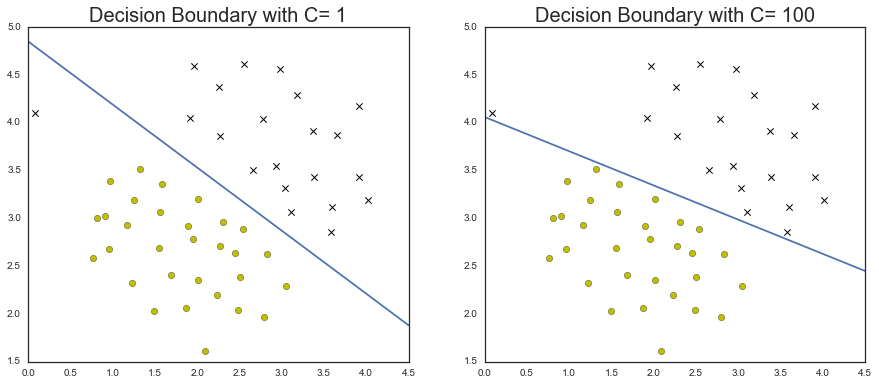

In [5]:
C = [1, 100]
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

for i, c in enumerate(C):
    clf = SVC(C = c, kernel='linear')
    clf.fit(data1[:, :2], data1[:, 2])
    # Plotting the linear decision boundary
    x1 = np.linspace(0, 4.5)
    x2 = - (clf.intercept_ + clf.coef_[0][0]*x1) / clf.coef_[0][1]

    plotRaw(data1, ax=ax[i])
    ax[i].set_xlim(0, 4.5)
    ax[i].set_ylim(1.5, 5)
    ax[i].plot(x1, x2)
    ax[i].set_title('Decision Boundary with C= {}'.format(c), fontsize=20)

C = 1/lambda, a positive value that controls the penalty for misclassified training examples. Small C means large regularization and less penalty for misclassification, vice versa.

In [6]:
def plotSVC(svc, X, y):
    x_min = X[:,0].min()-0.1
    x_max = X[:,0].max()+0.1
    y_min = X[:,1].min()-0.1
    y_max = X[:,1].max()+0.1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)
    
    plt.scatter(svc.support_vectors_[:,0], svc.support_vectors_[:,1], c='b', marker='|', linewidths=2)
    plt.show()
    print('Number of support vecotrs: ', svc.support_vectors_.shape[0])

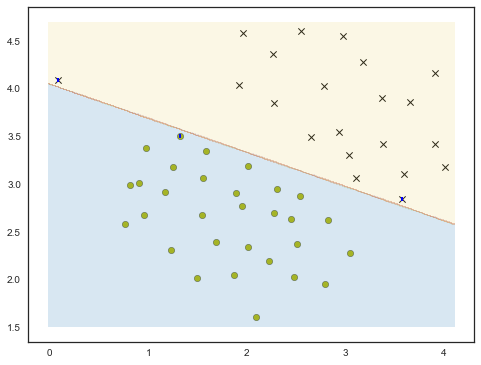

Number of support vecotrs:  3


In [7]:
plotRaw(data1, ax=plt.gca())
plotSVC(clf, data1[:,0:2], data1[:,:2])

We can visualize the classification by a contourf plot. The classes are separated by different colors.

### Gaussian Kernel

non-linear decision boundaries can be found by the Gaussian kernel, a similarity function that measures the "distance" between a pair of examples. The features should be scaled before using the Gaussian kernel.

In [8]:
def gaussianKernel(xi, xj, sigma):
    return np.exp(-np.sum((xi - xj)**2)/(2*(sigma**2)))

In [9]:
x1 = np.array([1, 2, 1])
x2 = np.array([0, 4, -1])
sigma = 2
gaussianKernel(x1, x2, sigma)    # This is the same as the rbf kernel

0.32465246735834974

The number indicates how similar x1 is to x2.

#### Example Dataset 2

In [10]:
matfile = scipy.io.loadmat('./machine-learning-ex6/ex6/ex6data2.mat')
data2 = np.c_[matfile['X'], matfile['y']]

(0.4, 1)

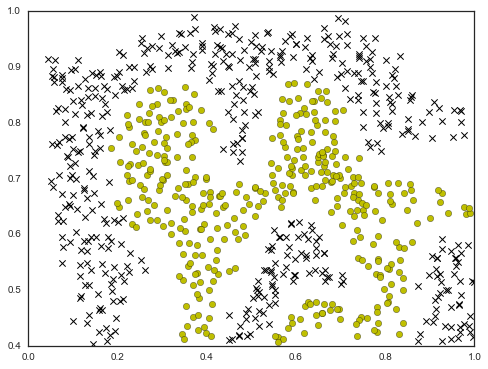

In [11]:
plotRaw(data2, plt.gca())
plt.xlim(0, 1)
plt.ylim(.4, 1)

In [12]:
svc = SVC(C=10, gamma=10).fit(data2[:,:2], data2[:,2])

Other than using C as the regularization, SVM is also tuned by gamma (similar to sigma), a parameter indicating how far the influence of a single training example reaches, with low values meaning ‘far’ and high values meaning ‘close’. The gamma parameters can be seen as the inverse of the radius of influence of samples selected by the model as support vectors.

In [13]:
clf2 = SVC(C=1, kernel='rbf')
clf2.fit(data2[:,:2], data2[:,2])

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

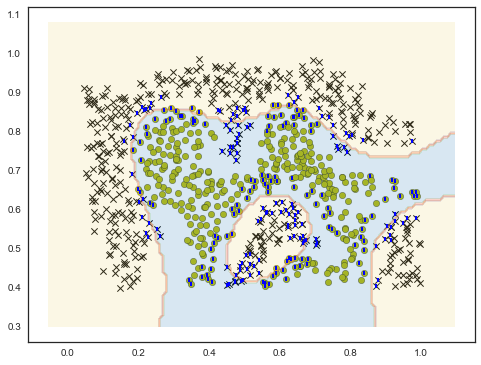

Number of support vecotrs:  253


In [14]:
plotRaw(data2, plt.gca())
plotSVC(svc, data2[:,:2], data2[:,2])

#### Example Dataset 3

In [15]:
matfile = scipy.io.loadmat('./machine-learning-ex6/ex6/ex6data3.mat')
data3 = np.c_[matfile['X'], matfile['y']]
data3_val = np.c_[matfile['Xval'], matfile['yval']]

In [16]:
C = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
gamma = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]

In [26]:
scores = {}
for c in C:
    for gam in gamma:
        svc = SVC(C=c, gamma=gam)
        svc.fit(data3[:,0:2], data3[:,2])
        key = 'C={}, gamma={}'.format(c, gam)
        scores[key] = [svc.score(data3_val[:,0:2], data3_val[:,2]), svc]

best_score = sorted(scores.items(), reverse=True)[0]

print('The best parameters are: ', best_score[0])
print('The best score is: ', best_score[1])

The best parameters are:  C=30, gamma=30
The best score is:  [0.95999999999999996, SVC(C=30, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=30, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)]


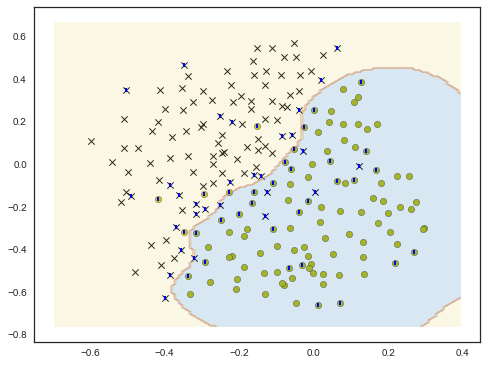

Number of support vecotrs:  62


In [28]:
plotRaw(data3, plt.gca())
plotSVC(best_score[1][1], data3[:,:2], data3[:,2])

In [20]:
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit

In [21]:
svc = SVC()
grid = GridSearchCV(svc, param_grid={'C': C, 'gamma': gamma}, cv=StratifiedShuffleSplit())
grid.fit(data3[:,0:2], data3[:,2])

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=None, test_size=0.1,
            train_size=None),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'gamma': [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30], 'C': [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [22]:
print('With GridSearchCV, the best parameters are: ', grid.best_params_)
print('The best score is: ', grid.best_score_)

With GridSearchCV, the best parameters are:  {'gamma': 3, 'C': 10}
The best score is:  0.922727272727


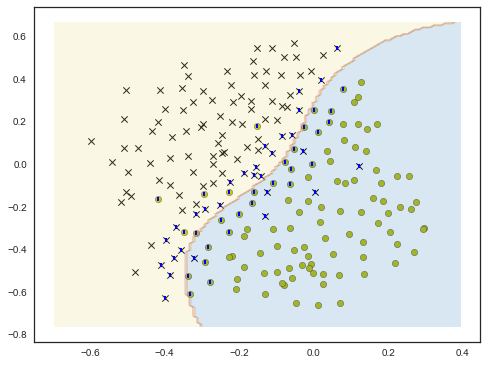

Number of support vecotrs:  57


In [23]:
plotRaw(data3, plt.gca())
plotSVC(grid.best_estimator_, data3[:,:2], data3[:,2])

## Spam Classification

In [36]:
def processEmail(word):
    with open('./machine-learning-ex6/ex6/vocab.txt') as f:
        line = f.readline()
        for word in line.split()[1]:
            return line.split()[0]
        else:
            pass

In [94]:
spamTrain = scipy.io.loadmat('./machine-learning-ex6/ex6/spamTrain.mat')
X_train = spamTrain['X']
y_train = spamTrain['y']

spamTest = scipy.io.loadmat('./machine-learning-ex6/ex6/spamTest.mat')
X_test = spamTest['Xtest']
y_test = spamTest['ytest']

In [96]:
spamC = SVC()
spamC.fit(X_train, y_train.ravel())

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [97]:
print('Training score: ', spamC.score(X_train, y_train.ravel()))

Training score:  0.944


In [98]:
print('Test score: ', spamC.score(X_test, y_test.ravel()))

Test score:  0.953
